In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf
sns.set_style('darkgrid') #background
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/Cars.csv")
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [ ]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [ ]:
df.tail()

,HP,MPG,VOL,SP,WT
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099
80,236,12.101263,107,139.840817,34.948615


In [ ]:
df.describe()
# positive skewness is there in HP as mean > median(50%)

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


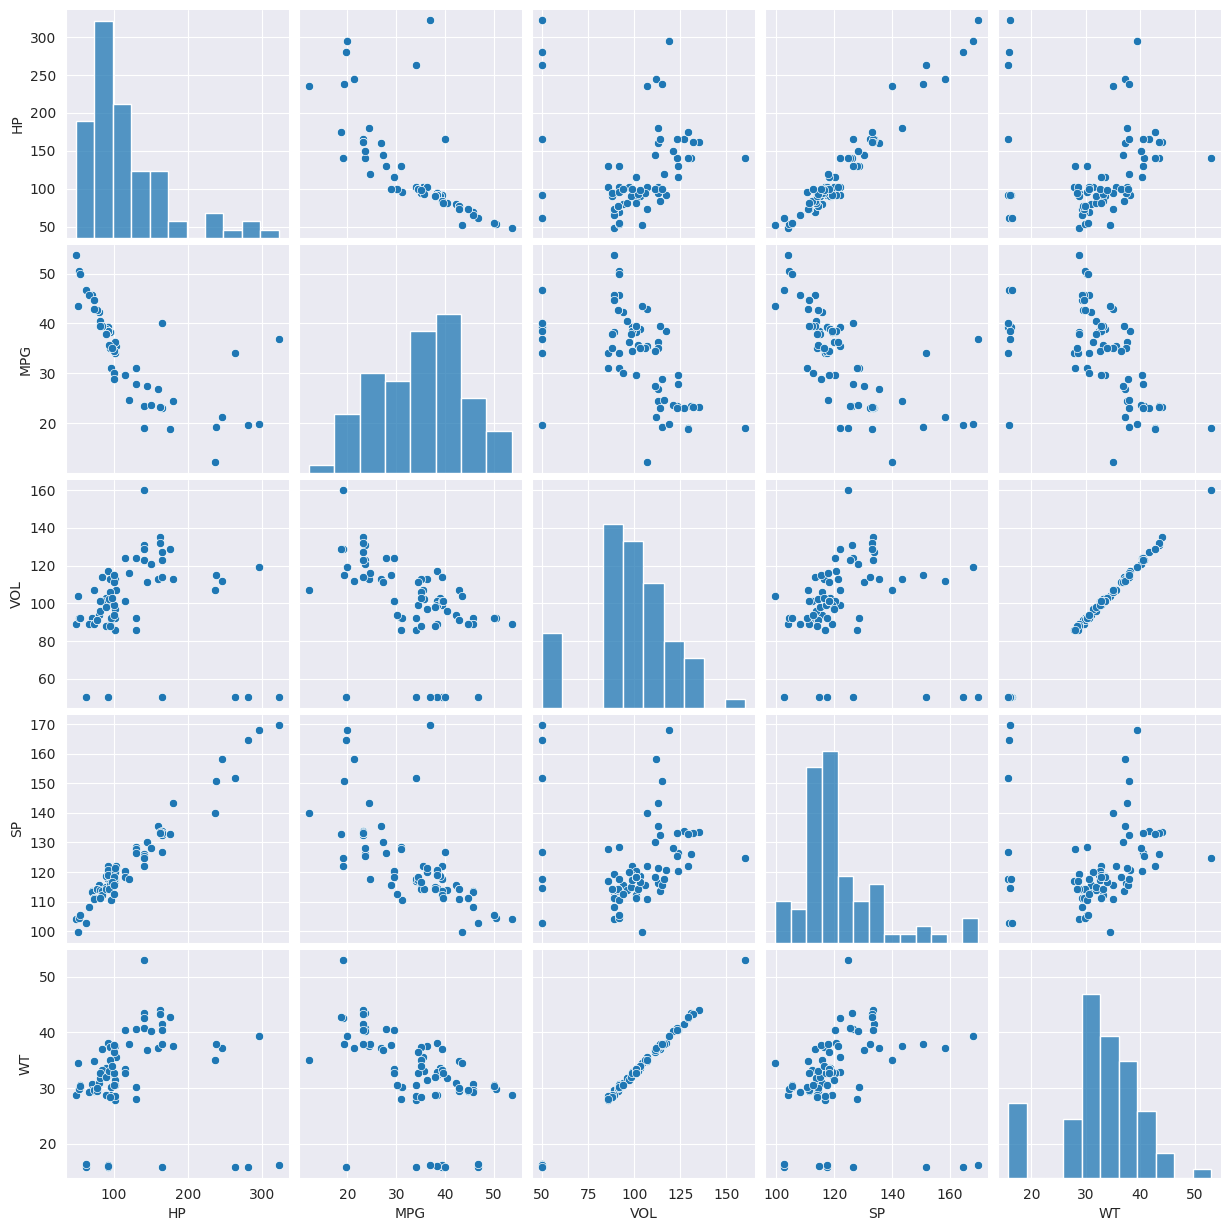

In [ ]:
sns.pairplot(df)

<Axes: >

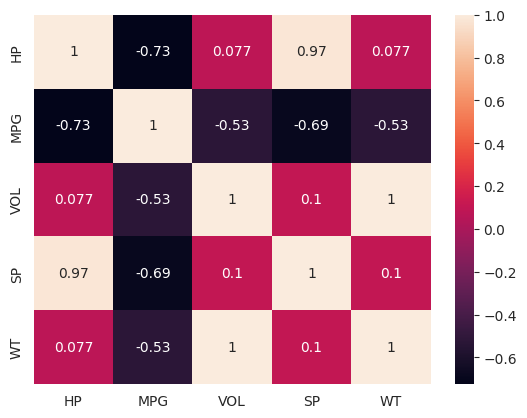

In [ ]:
sns.heatmap(df.corr(),annot=True)

# Model Building

In [ ]:
model=smf.ols('MPG~HP+VOL+SP+WT',data=df).fit()
model.pvalues

,0
Intercept,0.042936
HP,0.000001
VOL,0.556294
SP,0.014579
WT,0.813649


# Linear Regression

In [ ]:
# consider WT and exclude the VOL
wt=smf.ols('MPG~HP+SP+WT',data=df).fit()
wt.pvalues

,0
Intercept,5.053995e-02
HP,7.560276e-07
SP,1.089096e-02
WT,1.914892e-13


In [ ]:
# consider VOL and exclude the WT
vol=smf.ols('MPG~HP+SP+VOL',data=df).fit()
vol.pvalues

,0
Intercept,4.194554e-02
HP,8.644870e-07
SP,1.207855e-02
VOL,1.648229e-13


In [ ]:
# Conclusion WI & VOL both are imp but there are creating multicollinearity problem

# Calculate VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [ ]:
df.tail()

,HP,MPG,VOL,SP,WT
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099
80,236,12.101263,107,139.840817,34.948615


In [ ]:
data=df.drop(columns=['MPG'])
data

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [ ]:
# VIF = 1/1-rsquared for each variable

In [ ]:
data.values

array([[ 49.        ,  89.        , 104.1853528 ,  28.7620589 ],
       [ 55.        ,  92.        , 105.4612635 ,  30.46683298],
       [ 55.        ,  92.        , 105.4612635 ,  30.19359657],
       [ 70.        ,  92.        , 113.4612635 ,  30.63211391],
       [ 53.        ,  92.        , 104.4612635 ,  29.88914864],
       [ 70.        ,  89.        , 113.1853528 ,  29.59176832],
       [ 55.        ,  92.        , 105.4612635 ,  30.30847957],
       [ 62.        ,  50.        , 102.5985128 ,  15.84775807],
       [ 62.        ,  50.        , 102.5985128 ,  16.35948352],
       [ 80.        ,  94.        , 115.6452041 ,  30.92015417],
       [ 73.        ,  89.        , 111.1853528 ,  29.36334142],
       [ 92.        ,  50.        , 117.5985128 ,  15.75353468],
       [ 92.        ,  99.        , 122.1050553 ,  32.81359241],
       [ 73.        ,  89.        , 111.1853528 ,  29.3784363 ],
       [ 66.        ,  89.        , 108.1853528 ,  29.34727902],
       [ 73.        ,  89

In [ ]:
vif=pd.DataFrame()
vif

""


In [ ]:
vif['Features'] = data.columns
vif

,Features
0,HP
1,VOL
2,SP
3,WT


In [ ]:
len(data.columns)

4

In [ ]:
range(len(data.columns)) # 4 columns 0 to 3

range(0, 4)

In [ ]:
[variance_inflation_factor(data.values,i) for i in range(len(data.columns))]

[11.19129601632287, 12708.789368875166, 50.54196822792541, 12172.827328054147]

In [ ]:
vif['VIF'] = [variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
vif

,Features,VIF
0,HP,11.191296
1,VOL,12708.789369
2,SP,50.541968
3,WT,12172.827328


# Subset Selection

AIC Value

In [ ]:
# consider WT and exclude the VOL
wt=smf.ols('MPG~HP+SP+WT',data=df).fit()
wt.rsquared, wt.aic

(0.769482813998346, 476.29927501529767)

In [ ]:
# consider VOL and exclude the WT
vol=c
vol.rsquared, vol.aic

(0.7703683413213018, 475.98751588546094)

In [ ]:
# r square for VOL s high and low aic value for VOL so consider VOL column and drop WT column

# Model validation Techniques

In [ ]:
# creat final model
model = smf.ols('MPG~HP+SP+WT',data=df).fit()
model.rsquared # 77 is not a good model

0.769482813998346

In [ ]:
import statsmodels.api as sm # Q-Q plot function for error vs predicted

In [ ]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [ ]:
model.fittedvalues # predicted values means y hat values

,0
0,43.809702
1,42.057081
2,42.220862
3,42.092496
4,42.412604
...,...
76,21.131008
77,17.827656
78,26.310877
79,12.125713


In [ ]:
model.params # wil get all parameters which are y=B0+B1 x1 +b2 x2+----+e(e = error)

,0
Intercept,28.784808
HP,-0.208502
SP,0.407753
WT,-0.599413


In [ ]:
model.resid # error= y-yhat

,0
0,9.890979
1,7.956320
2,7.792539
3,3.603827
4,8.091628
...,...
76,15.768992
77,1.370231
78,7.689123
79,7.708020


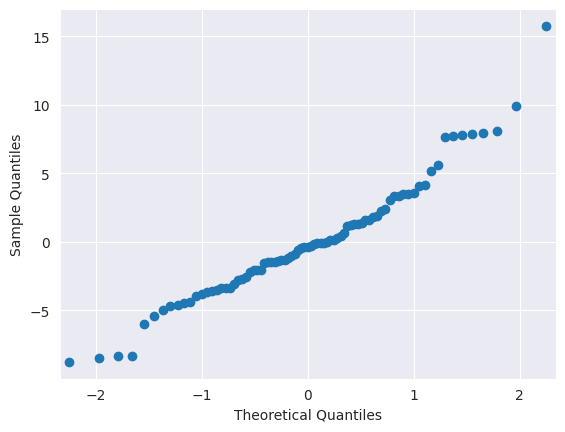

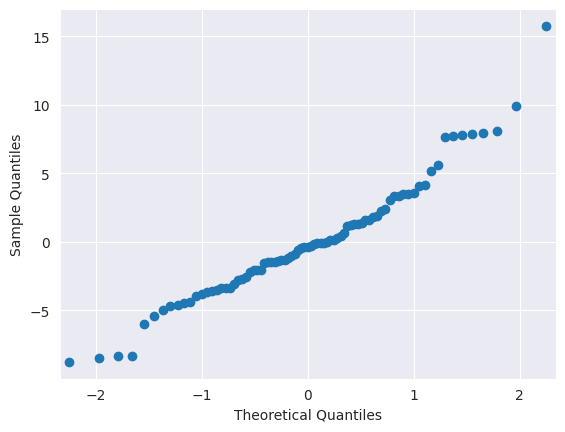

In [ ]:
sm.qqplot(model.resid)

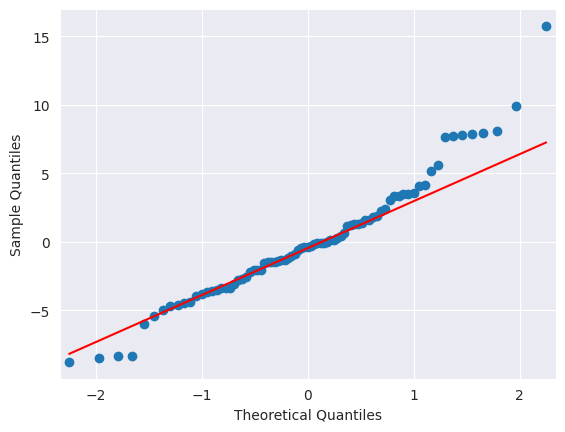

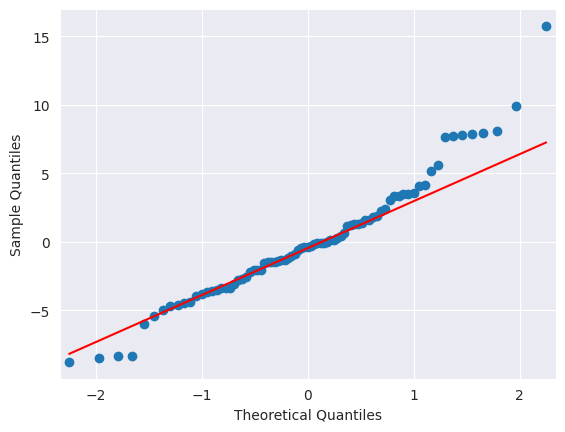

In [ ]:
sm.qqplot(model.resid,line='q')

In [ ]:
np.argmax(model.resid),np.max(model.resid)
# argmax() find out the max error value and return to index

(76, 15.768992122897522)

# Residual plot of Homoscedassticity

In [ ]:
model.params

,0
Intercept,28.784808
HP,-0.208502
SP,0.407753
WT,-0.599413


In [ ]:
model.fittedvalues

,0
0,43.809702
1,42.057081
2,42.220862
3,42.092496
4,42.412604
...,...
76,21.131008
77,17.827656
78,26.310877
79,12.125713


Text(0, 0.5, 'Errors')

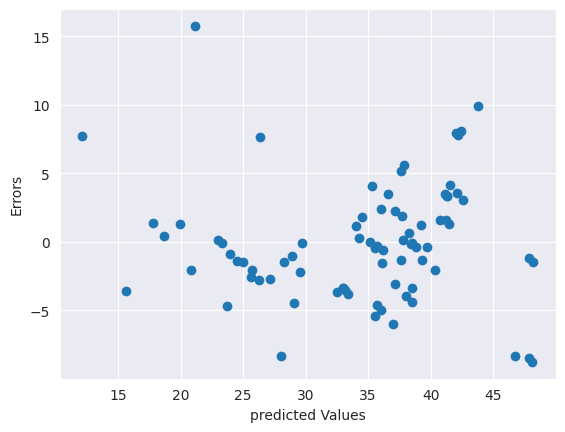

In [ ]:
plt.scatter(model.fittedvalues,model.resid)
plt.xlabel('predicted Values')
plt.ylabel('Errors')

# Residual  (y-yhat) Vs Regressor (x)

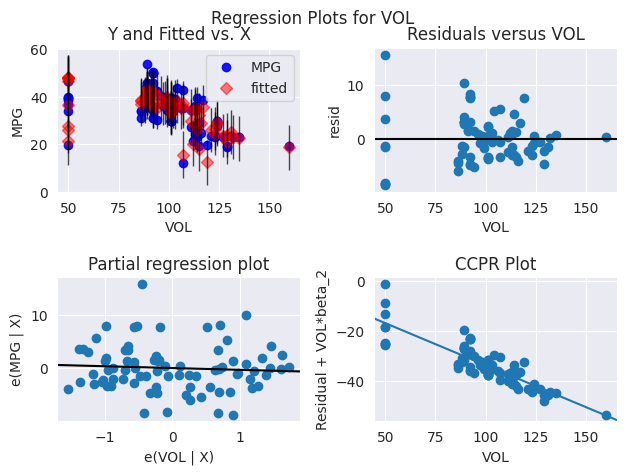

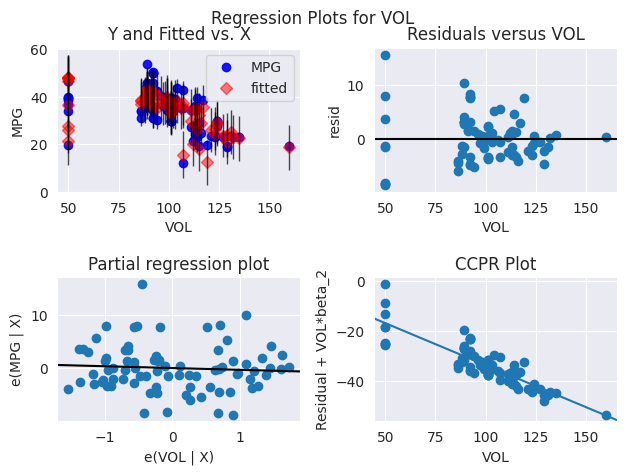

In [ ]:
#VOL
sm.graphics.plot_regress_exog(model,'VOL')

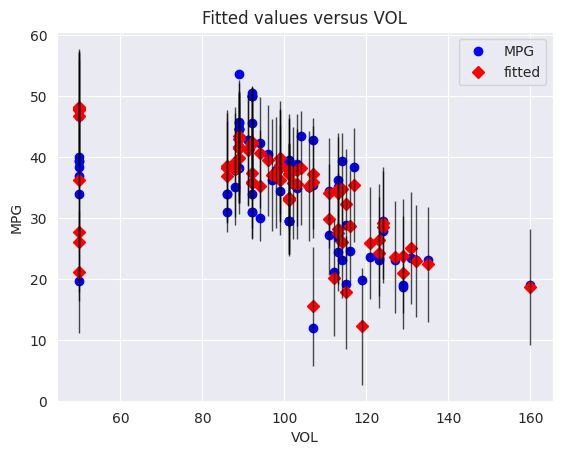

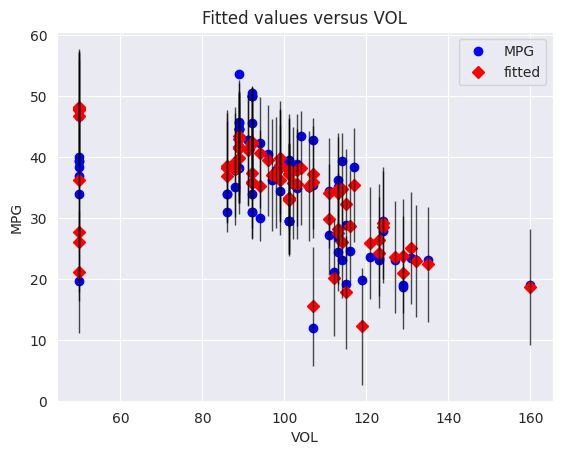

In [ ]:
#VOL
sm.graphics.plot_fit(model,'VOL')

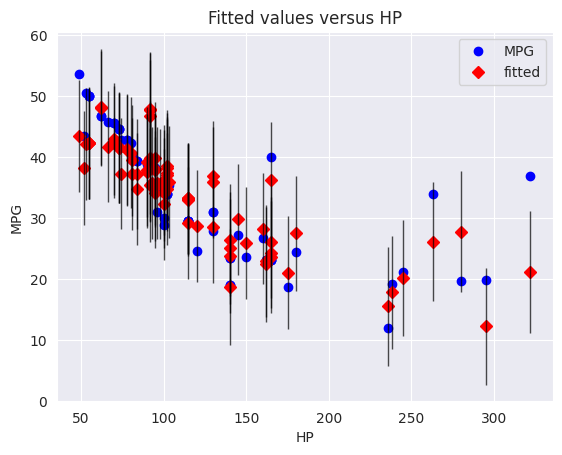

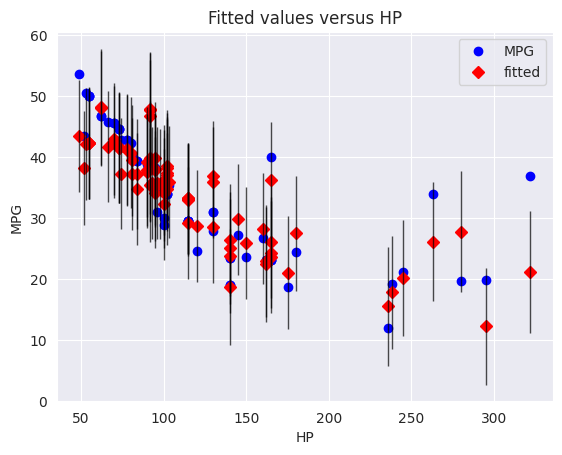

In [ ]:
sm.graphics.plot_fit(model,'HP')

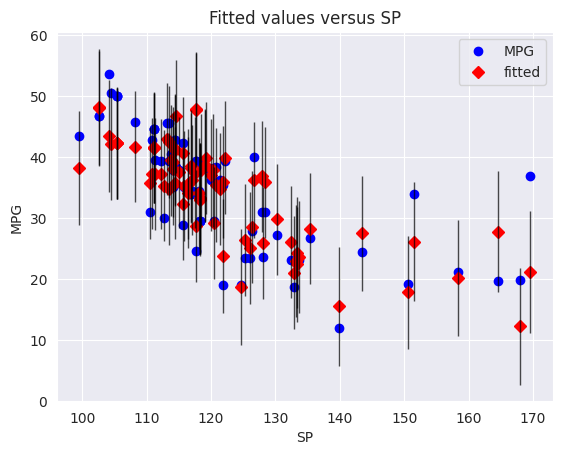

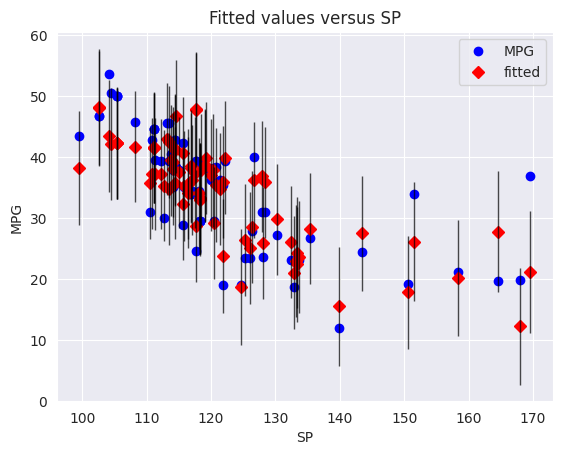

In [ ]:
sm.graphics.plot_fit(model,'SP')

# Model Deletion Techniques

In [ ]:
model

In [ ]:
# find a influence data
inf=model.get_influence()

In [ ]:
# find a crook's distance
c,p=inf.cooks_distance

In [ ]:
c

array([6.04797739e-02, 2.80207825e-02, 1.84833331e-02, 7.27752720e-03,
       2.96019879e-02, 4.81278004e-03, 2.07405847e-02, 2.55586700e-03,
       4.05692942e-03, 7.54004910e-04, 2.97311924e-03, 8.72887201e-02,
       3.32487183e-04, 3.06716174e-03, 5.27414633e-03, 5.29293219e-03,
       1.16531605e-03, 7.63273362e-02, 6.47114749e-04, 5.79692771e-04,
       1.13359020e-05, 1.03054091e-02, 1.53244850e-04, 3.10730928e-04,
       1.49488694e-03, 5.85742198e-02, 1.00598054e-02, 6.55605611e-05,
       3.30438001e-02, 1.81295962e-04, 1.33814932e-02, 9.97753151e-04,
       4.02570308e-04, 1.13711936e-03, 2.85608656e-03, 4.41332141e-05,
       3.27632348e-04, 4.70959014e-03, 1.21704644e-02, 8.96948188e-03,
       2.35324656e-04, 9.75839299e-06, 4.49488700e-03, 4.48437031e-03,
       1.02593360e-05, 4.75617324e-04, 2.22586830e-05, 4.66305687e-05,
       1.27051048e-02, 5.33728062e-03, 2.98638028e-03, 5.00671925e-03,
       1.29659561e-04, 1.14393086e-02, 8.61438068e-04, 2.46695414e-04,
      

Text(0, 0.5, "cook's Distance")

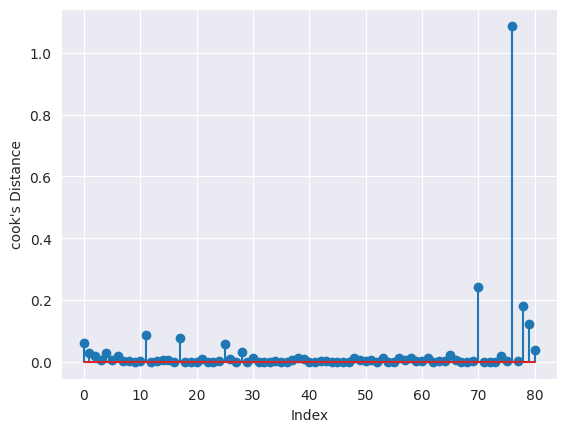

In [ ]:
plt.stem(c)
plt.xlabel('Index')
plt.ylabel("cook's Distance")

In [ ]:
np.argmax(c),np.max(c)

(76, 1.086519399817987)

In [ ]:
df.iloc[[76]]

,HP,MPG,VOL,SP,WT
76,322,36.9,50,169.598513,16.132947


In [ ]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [ ]:
# influence plot
from statsmodels.graphics.regressionplots import influence_plot

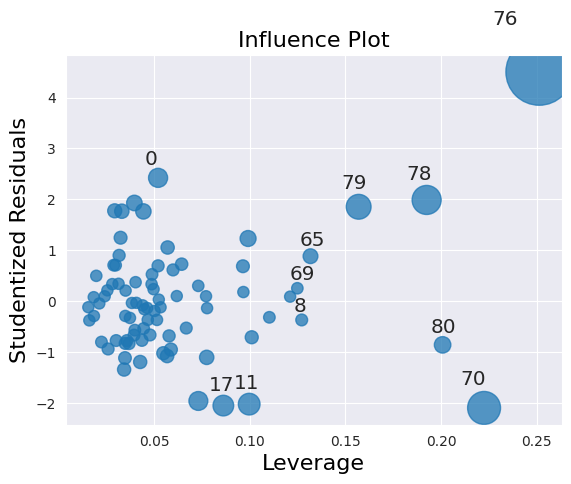

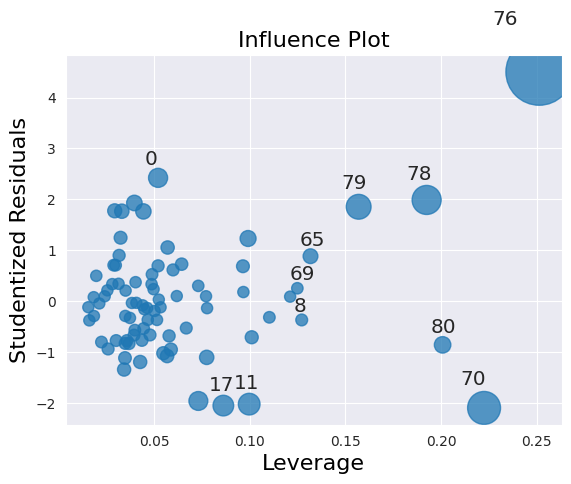

In [ ]:
influence_plot(model)

In [ ]:
k=len(df.columns)
n=len(df)
leverage = 3*(k+1)/n
leverage

0.2222222222222222

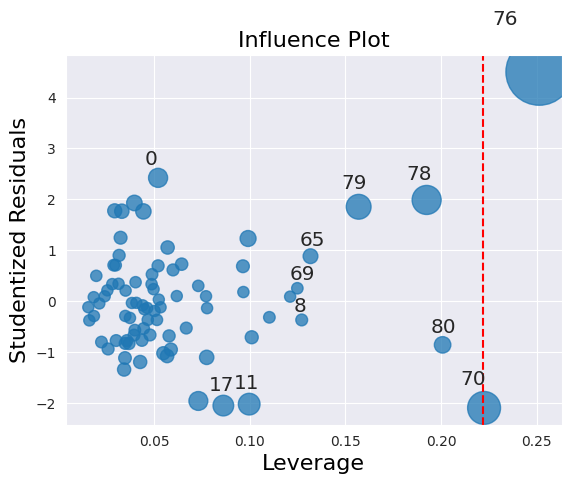

In [ ]:
influence_plot(model)
plt.axvline(leverage, linestyle="--",color='Red')

In [ ]:
df.drop(index=76,inplace=True)
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
75,175,18.762837,129,132.864163,42.778219
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [ ]:
df.reset_index(inplace=True)
df

,level_0,index,HP,MPG,VOL,SP,WT
0,0,0,49,53.700681,89,104.185353,28.762059
1,1,1,55,50.013401,92,105.461264,30.466833
2,2,2,55,50.013401,92,105.461264,30.193597
3,3,3,70,45.696322,92,113.461264,30.632114
4,4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...,...
75,75,75,175,18.762837,129,132.864163,42.778219
76,76,77,238,19.197888,115,150.576579,37.923113
77,77,78,263,34.000000,50,151.598513,15.769625
78,78,79,295,19.833733,119,167.944460,39.423099


In [ ]:
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
75,175,18.762837,129,132.864163,42.778219
76,238,19.197888,115,150.576579,37.923113
77,263,34.000000,50,151.598513,15.769625
78,295,19.833733,119,167.944460,39.423099


In [ ]:
final_model = smf.ols('MPG~HP+VOL+SP',data=df).fit()
final_model

# Predicting the new records

In [ ]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [ ]:
test=pd.DataFrame({
    "HP":[56,53.62,95],
    'VOL':[92.6,85.63,75],
    'SP':[110,112,150]
                   })

In [ ]:
test

,HP,VOL,SP
0,56.00,92.60,110
1,53.62,85.63,112
2,95.00,75.00,150


In [ ]:
final_model.predict(test)

,0
0,44.410251
1,46.979473
2,55.103295
